<a href="https://colab.research.google.com/github/gnishimirwe/ML-DL-projects/blob/main/Bank_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA**

In [ ]:
bank= pd.read_csv('/content/drive/MyDrive/bank-full.csv', sep=';') 
bank.head()

In [ ]:
bank.shape

In [ ]:
bank.info()

In [ ]:
bank.isnull().sum()[bank.isnull().sum()>0]

In [ ]:
bank.select_dtypes(include='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
le= LabelEncoder()

In [ ]:
bank['default']= le.fit_transform(bank['default'])
bank['housing']= le.fit_transform(bank['housing'])
bank['loan']= le.fit_transform(bank['loan'])
bank['y']= le.fit_transform(bank['y'])
#bank['month']= le.fit_transform(bank['month'])
bank['education']= le.fit_transform(bank['education'])
'''columns=['default','housing','loan','y']
for i in columns:
  bank[i]= le.fit_transform(bank[i])'''

In [ ]:
bank['pdays']= bank['pdays'].replace(to_replace=-1,value=0)
bank['pdays'].value_counts()

In [ ]:
bank['poutcome'].value_counts()

In [ ]:
bank= bank.drop(columns='contact')

In [ ]:
bank= pd.get_dummies(bank, drop_first=True)

In [ ]:
'''
month_labels = {'jan':1,'feb':2, 'mar':3, 'apr':4, 'may':5 , 'jun':6, 'jul': 7, 'aug' :8,
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
bank.month= bank.month.map(month_labels)'''

In [ ]:
bank.head()

In [ ]:
plt.figure(figsize=(9,5), dpi=100)
plt.xticks(rotation=90)
plt.title('Correlation with target')
sns.barplot(y=bank.corr()['y'].sort_values()[:-1], 
            x=bank.corr()['y'].sort_values()[:-1].index);

In [ ]:
bank['y'].value_counts()

In [ ]:
ax=sns.countplot(x='y',data=bank)
total = float(len(bank))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

# **BALANCING DATA** 

In [ ]:
from imblearn.over_sampling import SMOTE
ovs= SMOTE()

In [ ]:
x= bank.drop(columns='y')
y= bank['y']

In [ ]:
x,y= ovs.fit_resample(x,y)

bank_df=x
bank_df['target']= y

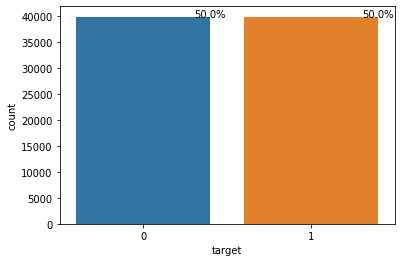

In [ ]:
ax=sns.countplot(x='target',data=bank_df)
total = float(len(bank_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [ ]:
bank_df.shape, bank.shape

((79844, 39), (45211, 39))

In [ ]:
bank_df.describe()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,target
count,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,...,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000,79844.000000
mean,40.910413,1.151182,0.010683,1534.934021,0.386466,0.096012,15.311871,378.827451,2.352725,52.035181,...,0.072241,0.007665,0.191661,0.053504,0.012136,0.008654,0.026502,0.061570,0.732303,0.500000
std,10.909694,0.698881,0.102807,3145.825331,0.486943,0.294610,7.822697,349.121374,2.577344,107.100686,...,0.258888,0.087214,0.393610,0.225038,0.109494,0.092626,0.160623,0.240375,0.442762,0.500003
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,122.000000,0.000000,0.000000,9.000000,145.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,555.500000,0.000000,0.000000,15.000000,260.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,48.000000,2.000000,0.000000,1733.000000,1.000000,0.000000,21.000000,506.000000,3.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,95.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X= bank_df.drop(columns='target')
Y= bank_df['target']

In [ ]:
X.shape, Y.shape

((79844, 38), (79844,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3)

In [ ]:
X_train.shape, y_train.shape

((55890, 38), (55890,))

In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

X_train= ss.fit_transform(X_train)
X_test= ss.fit_transform(X_test)

In [ ]:
X_train.shape, y_train.shape

((55890, 38), (55890,))

# **ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

model= tf.keras.Sequential()

In [ ]:
'''model.add(Dense(units=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))'''

"model.add(Dense(units=X_train.shape[1], kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))"

In [ ]:
X_train.shape[1]

38

In [ ]:
model= keras.Sequential([
                         keras.layers.Dense(10, input_shape=(X_train.shape[1],),activation='sigmoid'),
                         keras.layers.Dense(36,activation='relu'),
                         keras.layers.Dense(64,activation='relu'),
                         keras.layers.Dense(150,activation='relu'),
                         keras.layers.Dense(1,activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy']
)

In [ ]:
model.layers

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1747/1747 [==============================] - 5s 2ms/step - loss: 0.2172 - accuracy: 0.9138
Epoch 2/100
1747/1747 [==============================] - 4s 2ms/step - loss: 0.1846 - accuracy: 0.9214
Epoch 3/100
1747/1747 [==============================] - 4s 3ms/step - loss: 0.1791 - accuracy: 0.9239
Epoch 4/100
1747/1747 [==============================] - 4s 3ms/step - loss: 0.1758 - accuracy: 0.9246
Epoch 5/100
1747/1747 [==============================] - 4s 3ms/step - loss: 0.1737 - accuracy: 0.9265
Epoch 6/100
1747/1747 [==============================] - 7s 4ms/step - loss: 0.1714 - accuracy: 0.9272
Epoch 7/100
1747/1747 [==============================] - 4s 2ms/step - loss: 0.1698 - accuracy: 0.9280
Epoch 8/100
1747/1747 [==============================] - 4s 2ms/step - loss: 0.1688 - accuracy: 0.9279
Epoch 9/100
1747/1747 [==============================] - 4s 2ms/step - loss: 0.1670 - accuracy: 0.9293
Epoch 10/100
1747/1747 [==============================] - 4s 2ms/step - l

In [ ]:
model.evaluate(X_test,y_test)

749/749 [==============================] - 1s 2ms/step - loss: 0.2000 - accuracy: 0.9290


[0.19995847344398499, 0.9289888739585876]

In [ ]:
y_predict= model.predict(X_test)
y_predict

array([[3.4093521e-08],
       [1.0000000e+00],
       [1.5003949e-02],
       ...,
       [3.4502149e-04],
       [9.8815089e-01],
       [1.4349818e-04]], dtype=float32)

In [ ]:
y_predict.astype(int).shape

(23954, 1)

In [ ]:
a= y_predict>.5
a.astype(int)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
a.shape

(23954, 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, a)

0.928988895382817

# **Machine learning model**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

ada= AdaBoostClassifier()
bc= BaggingClassifier()
gbc= GradientBoostingClassifier()
xgb= XGBClassifier()

In [ ]:
ml_model= [ada, bc, gbc, gbc, xgb]

In [ ]:
ada.fit(X_train, y_train), bc.fit(X_train, y_train), gbc.fit(X_train, y_train), xgb.fit(X_train, y_train)

(AdaBoostClassifier(),
 BaggingClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier())

In [ ]:
for i in ml_model:
  ml_pred= i.predict(X_test)
  y=accuracy_score(y_test,ml_pred)
  print("%s has accuracy of %f"%(i, accuracy_score(y_test,ml_pred)))


AdaBoostClassifier() has accuracy of 0.920807
BaggingClassifier() has accuracy of 0.930951
GradientBoostingClassifier() has accuracy of 0.925649
GradientBoostingClassifier() has accuracy of 0.925649
XGBClassifier() has accuracy of 0.926526
